Кемерова А.М. ИУ5-61Б Вариант №10

# Задача 1. Классификация текстов на основе методов наивного Байеса.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier


In [2]:
# Загрузка данных
data = pd.read_csv("amazon_cells_labelled.txt", delimiter='\t', header=None, names=['text', 'value'])
data.head()

,text,value
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
data.shape

(1000, 2)

# Разделение выборки на обучающую и тестовую

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['value'], test_size=0.25, random_state=1)

In [5]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (750,)
X_test: (250,)
y_train: (750,)
y_test: (250,)


In [6]:
X_train

298                       Customer service was terrible.
160    All I can do is whine on the Internet, so here...
268                             Don't waste your money!.
658                 Talk about USELESS customer service.
996    What a piece of junk.. I lose more calls on th...
                             ...                        
767    I really wanted the Plantronics 510 to be the ...
72                                         Great choice!
908    I can hear while I'm driving in the car, and u...
235                   One of my favorite purchases ever.
37                           Poor Talk Time Performance.
Name: text, Length: 750, dtype: object

In [7]:
X_test

507    The holster that arrived did not match the pho...
818                                  Doesn't do the job.
452    My colleague & I now get great reception.A lit...
368                                     Love This Phone.
242                         Worst Customer Service Ever.
                             ...                        
385    The worst piece of crap ever along with the Ve...
890    The speaker is of low quality so as making the...
439    If you don't find it, too bad, as again the un...
135    The majority of the Logitech earbud headsets f...
567    Great it was new packaged nice works good, no ...
Name: text, Length: 250, dtype: object

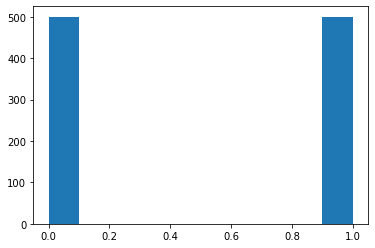

In [8]:
# В целевом признаке распределение классов равномерное
plt.hist(data['value'])
plt.show()

In [9]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None, 
                             use_idf=True, ngram_range=(1,1),
                             smooth_idf=False)                        
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [10]:
X_train

<750x1541 sparse matrix of type '<class 'numpy.float64'>'
	with 6874 stored elements in Compressed Sparse Row format>

In [11]:
X_test

<250x1541 sparse matrix of type '<class 'numpy.float64'>'
	with 1914 stored elements in Compressed Sparse Row format>

# Оценка качества классификации с помощью различных методов

In [12]:
def test_model(classifiers_list):
    for c in classifiers_list:
        c.fit(X_train, y_train)
        y_pred = c.predict(X_test)
        print('Модель для классификации - {}'.format(c)) 
        print('====================================')
        print('accuracy_score:  ', accuracy_score(y_test, y_pred))
        print('precision_score: ', precision_score(y_test, y_pred))
        print('recall_score:    ', recall_score(y_test, y_pred))
        print('f1_score:        ', f1_score(y_test, y_pred))  
        print('====================================')

In [13]:
classifiers_list = [DecisionTreeClassifier(random_state=1),
                    SVC(kernel='rbf'), 
                    MultinomialNB(),
                    ComplementNB(),
                    BernoulliNB()]
test_model(classifiers_list)

Модель для классификации - DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
accuracy_score:   0.716
precision_score:  0.6974789915966386
recall_score:     0.7033898305084746
f1_score:         0.7004219409282699
Модель для классификации - SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
accuracy_score:   0.828
precision_score:  0.831858407079646
recall_score:     0.7966101694915254
f1_score:         0.8138528138528137
Мод